<a href="https://colab.research.google.com/github/javagarm/Titanic-Survival-Prediction/blob/master/Titanic_Survival_Prediction1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
train_data = pd.read_csv("/content/drive/My Drive/titanic/train.csv")
test_data = pd.read_csv("/content/drive/My Drive/titanic/test.csv")

# **Training Data and its Feature Engineering**

In [ ]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
train_data.shape

(891, 12)

In [ ]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


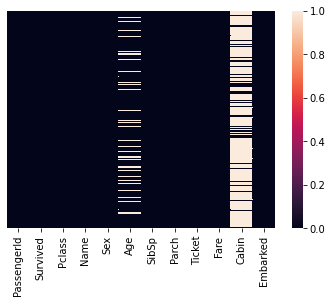

In [ ]:
sns.heatmap(train_data.isnull(),yticklabels=False)

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.Pclass.unique()

array([3, 1, 2])

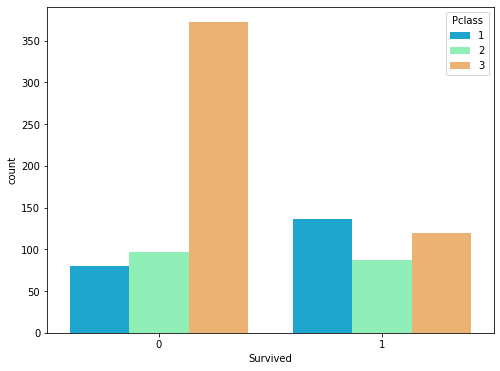

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived',hue='Pclass',data=train_data,palette='rainbow')

In [ ]:
train_data.Sex.unique()

array(['male', 'female'], dtype=object)

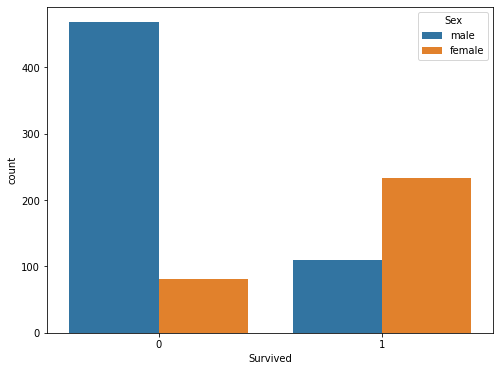

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived',hue='Sex',data=train_data)

In [ ]:
train_data.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


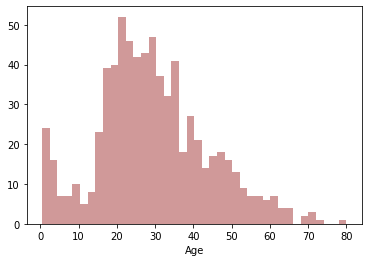

In [ ]:
sns.distplot(train_data['Age'].dropna(),kde=False,color='darkred',bins=40)

In [ ]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
train_data.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [ ]:
train_data['Title']=0
train_data['Title']=train_data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
train_data['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
train_data['Name_length'] = train_data['Name'].apply(len)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,24


In [ ]:
train_data.loc[(train_data.Age.isnull())&(train_data.Title=='Mr'),'Age']= train_data.Age[train_data.Title=="Mr"].mean()
train_data.loc[(train_data.Age.isnull())&(train_data.Title=='Mrs'),'Age']= train_data.Age[train_data.Title=="Mrs"].mean()
train_data.loc[(train_data.Age.isnull())&(train_data.Title=='Master'),'Age']= train_data.Age[train_data.Title=="Master"].mean()
train_data.loc[(train_data.Age.isnull())&(train_data.Title=='Miss'),'Age']= train_data.Age[train_data.Title=="Miss"].mean()
train_data.loc[(train_data.Age.isnull())&(train_data.Title=='Other'),'Age']= train_data.Age[train_data.Title=="Other"].mean()


In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Name_length      0
dtype: int64

In [ ]:
train_data.Age.unique()

array([22.        , 38.        , 26.        , 35.        , 32.7396088 ,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       35.98181818, 34.        , 15.        , 28.        ,  8.        ,
       19.        , 21.86      , 40.        , 66.        , 42.        ,
       21.        , 18.        ,  3.        ,  7.        , 49.        ,
       29.        , 65.        , 28.5       ,  5.        , 11.        ,
       45.        ,  4.57416667, 17.        , 32.        , 16.        ,
       25.        ,  0.83      , 30.        , 33.        , 23.        ,
       24.        , 46.        , 59.        , 71.        , 37.        ,
       47.        , 14.5       , 70.5       , 32.5       , 12.        ,
        9.        , 36.5       , 51.        , 55.5       , 40.5       ,
       44.        ,  1.        , 61.        , 56.        , 50.        ,
       36.        , 45.5       , 20.5       , 62.        , 41.  

In [ ]:
train_data.shape

(891, 14)

In [ ]:
train_data=train_data.dropna(subset=['Age','Embarked'])

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Name_length      0
dtype: int64

In [ ]:
train_data.shape

(889, 14)

In [ ]:
xtrain_data = train_data.drop(['Cabin','Ticket','Name'], axis =1 )

In [ ]:
xtrain_data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
Ticketclass = {3:"lower_class",2:'middle_class',1:'upper_class'}
xtrain_data['Pclass'] = xtrain_data['Pclass'].map(Ticketclass)

In [ ]:
xtrain_data.Pclass.unique()

array(['lower_class', 'upper_class', 'middle_class'], dtype=object)

In [ ]:
train_titan = xtrain_data

In [ ]:
train_titan.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Name_length
0,1,0,lower_class,male,22.0,1,0,7.2500,S,Mr,23
1,2,1,upper_class,female,38.0,1,0,71.2833,C,Mrs,51
2,3,1,lower_class,female,26.0,0,0,7.9250,S,Miss,22
3,4,1,upper_class,female,35.0,1,0,53.1000,S,Mrs,44
4,5,0,lower_class,male,35.0,0,0,8.0500,S,Mr,24


In [ ]:
train_dummy = pd.get_dummies(train_titan[['Pclass','Sex','Embarked']],)

In [ ]:
train_titan=pd.concat([train_titan.drop(['Pclass','Sex','Embarked'],axis=1),train_dummy],axis=1)

In [ ]:
train_titan.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Title,Name_length,Pclass_lower_class,Pclass_middle_class,Pclass_upper_class,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,Mr,23,1,0,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,Mrs,51,0,0,1,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,Miss,22,1,0,0,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,Mrs,44,0,0,1,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,Mr,24,1,0,0,0,1,0,0,1


In [ ]:
train_titan.isnull().sum()

PassengerId            0
Survived               0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Title                  0
Name_length            0
Pclass_lower_class     0
Pclass_middle_class    0
Pclass_upper_class     0
Sex_female             0
Sex_male               0
Embarked_C             0
Embarked_Q             0
Embarked_S             0
dtype: int64

In [ ]:
train_titan.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Title,Name_length,Pclass_lower_class,Pclass_middle_class,Pclass_upper_class,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,Mr,23,1,0,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,Mrs,51,0,0,1,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,Miss,22,1,0,0,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,Mrs,44,0,0,1,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,Mr,24,1,0,0,0,1,0,0,1


In [ ]:
train_titan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          889 non-null    int64  
 1   Survived             889 non-null    int64  
 2   Age                  889 non-null    float64
 3   SibSp                889 non-null    int64  
 4   Parch                889 non-null    int64  
 5   Fare                 889 non-null    float64
 6   Title                889 non-null    object 
 7   Name_length          889 non-null    int64  
 8   Pclass_lower_class   889 non-null    uint8  
 9   Pclass_middle_class  889 non-null    uint8  
 10  Pclass_upper_class   889 non-null    uint8  
 11  Sex_female           889 non-null    uint8  
 12  Sex_male             889 non-null    uint8  
 13  Embarked_C           889 non-null    uint8  
 14  Embarked_Q           889 non-null    uint8  
 15  Embarked_S           889 non-null    uin

In [ ]:
train_titan.Age.value_counts()

32.739609    120
21.860000     36
24.000000     30
22.000000     27
18.000000     26
            ... 
53.000000      1
66.000000      1
70.500000      1
20.500000      1
0.420000       1
Name: Age, Length: 92, dtype: int64

In [ ]:
train_titan.Age.unique()


array([22.        , 38.        , 26.        , 35.        , 32.7396088 ,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       35.98181818, 34.        , 15.        , 28.        ,  8.        ,
       19.        , 21.86      , 40.        , 66.        , 42.        ,
       21.        , 18.        ,  3.        ,  7.        , 49.        ,
       29.        , 65.        , 28.5       ,  5.        , 11.        ,
       45.        ,  4.57416667, 17.        , 32.        , 16.        ,
       25.        ,  0.83      , 30.        , 33.        , 23.        ,
       24.        , 46.        , 59.        , 71.        , 37.        ,
       47.        , 14.5       , 70.5       , 32.5       , 12.        ,
        9.        , 36.5       , 51.        , 55.5       , 40.5       ,
       44.        ,  1.        , 61.        , 56.        , 50.        ,
       36.        , 45.5       , 20.5       , 62.        , 41.  

In [ ]:
train_titan.Age = train_titan.Age.astype(int)

In [ ]:
train_titan.Age.unique()

array([22, 38, 26, 35, 32, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 21, 40, 66, 42, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [ ]:
train_titan['Age'].replace({0:1},inplace = True)

In [ ]:
train_titan['Fare'] = np.round(train_titan.Fare,decimals=3)

In [ ]:
train_titan.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Title,Name_length,Pclass_lower_class,Pclass_middle_class,Pclass_upper_class,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22,1,0,7.250,Mr,23,1,0,0,0,1,0,0,1
1,2,1,38,1,0,71.283,Mrs,51,0,0,1,1,0,1,0,0
2,3,1,26,0,0,7.925,Miss,22,1,0,0,1,0,0,0,1
3,4,1,35,1,0,53.100,Mrs,44,0,0,1,1,0,0,0,1
4,5,0,35,0,0,8.050,Mr,24,1,0,0,0,1,0,0,1


In [ ]:
train_titan = train_titan.drop('Title',axis = 1)

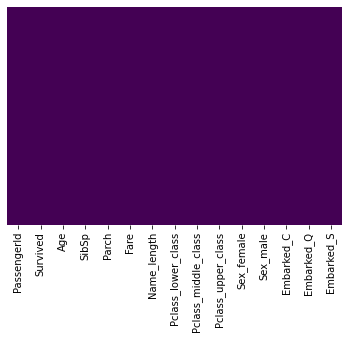

In [ ]:
sns.heatmap(train_titan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train_titan.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Name_length,Pclass_lower_class,Pclass_middle_class,Pclass_upper_class,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22,1,0,7.250,23,1,0,0,0,1,0,0,1
1,2,1,38,1,0,71.283,51,0,0,1,1,0,1,0,0
2,3,1,26,0,0,7.925,22,1,0,0,1,0,0,0,1
3,4,1,35,1,0,53.100,44,0,0,1,1,0,0,0,1
4,5,0,35,0,0,8.050,24,1,0,0,0,1,0,0,1


# **Testing Data and its Feature Engineering**

In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_data['Title']=0
test_data['Title']=test_data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
test_data['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
test_data['Name_length'] = test_data['Name'].apply(len)

In [ ]:
test_data.loc[(test_data.Age.isnull())&(test_data.Title=='Mr'),'Age']= test_data.Age[test_data.Title=="Mr"].mean()
test_data.loc[(test_data.Age.isnull())&(test_data.Title=='Mrs'),'Age']= test_data.Age[test_data.Title=="Mrs"].mean()
test_data.loc[(test_data.Age.isnull())&(test_data.Title=='Master'),'Age']= test_data.Age[test_data.Title=="Master"].mean()
test_data.loc[(test_data.Age.isnull())&(test_data.Title=='Miss'),'Age']= test_data.Age[test_data.Title=="Miss"].mean()
test_data.loc[(test_data.Age.isnull())&(test_data.Title=='Other'),'Age']= test_data.Age[test_data.Title=="Other"].mean()


In [ ]:
test_data.head(8)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_length
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,16
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,32
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,25
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,16
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,44
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr,26
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss,20
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr,28


In [ ]:
test_data.shape

(418, 13)

In [ ]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
Name_length      0
dtype: int64

In [ ]:
xtest_data = test_data.drop({'Name','Cabin','Title'},axis = 1)


In [ ]:
xtest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
 9   Name_length  418 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [ ]:
Ticketclass = {3:"lower_class",2:'middle_class',1:'upper_class'}
xtest_data['Pclass'] = xtest_data['Pclass'].map(Ticketclass)

In [ ]:
test_dummies = pd.get_dummies(xtest_data[['Pclass','Sex','Embarked']])

In [ ]:
test_dummies.head()

,Pclass_lower_class,Pclass_middle_class,Pclass_upper_class,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0,1
2,0,1,0,0,1,0,1,0
3,1,0,0,0,1,0,0,1
4,1,0,0,1,0,0,0,1


In [ ]:
test_titan = pd.concat([xtest_data.drop(['Pclass','Sex','Embarked'],axis =1),test_dummies],axis = 1)

In [ ]:
test_titan.head()

,PassengerId,Age,SibSp,Parch,Ticket,Fare,Name_length,Pclass_lower_class,Pclass_middle_class,Pclass_upper_class,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,330911,7.8292,16,1,0,0,0,1,0,1,0
1,893,47.0,1,0,363272,7.0000,32,1,0,0,1,0,0,0,1
2,894,62.0,0,0,240276,9.6875,25,0,1,0,0,1,0,1,0
3,895,27.0,0,0,315154,8.6625,16,1,0,0,0,1,0,0,1
4,896,22.0,1,1,3101298,12.2875,44,1,0,0,1,0,0,0,1


In [ ]:
test_titan.shape

(418, 15)

In [ ]:
test_titan.Fare= np.round(test_titan.Fare,decimals=3)

In [ ]:
test_titan.isnull().sum()

PassengerId            0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   1
Name_length            0
Pclass_lower_class     0
Pclass_middle_class    0
Pclass_upper_class     0
Sex_female             0
Sex_male               0
Embarked_C             0
Embarked_Q             0
Embarked_S             0
dtype: int64

In [ ]:
test_titan['Fare'].fillna(train_data['Fare'].mean(), inplace=True)


In [ ]:
test_titan.head()

,PassengerId,Age,SibSp,Parch,Ticket,Fare,Name_length,Pclass_lower_class,Pclass_middle_class,Pclass_upper_class,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,330911,7.829,16,1,0,0,0,1,0,1,0
1,893,47.0,1,0,363272,7.000,32,1,0,0,1,0,0,0,1
2,894,62.0,0,0,240276,9.688,25,0,1,0,0,1,0,1,0
3,895,27.0,0,0,315154,8.662,16,1,0,0,0,1,0,0,1
4,896,22.0,1,1,3101298,12.288,44,1,0,0,1,0,0,0,1


In [ ]:
test_titan.Age = test_titan.Age.astype(int)

In [ ]:
test_titan.Age.unique()

array([34, 47, 62, 27, 22, 14, 30, 26, 18, 21, 32, 46, 23, 63, 24, 35, 45,
       55,  9, 38, 48, 50, 41, 33, 25, 39, 60, 36, 20, 28, 10, 17, 13, 31,
       29,  6, 67, 49,  2, 76, 43, 16,  1, 12, 42, 53, 40, 61,  7, 15, 54,
       64, 37, 11,  8,  0, 57, 19, 58, 59, 44,  5, 51,  3])

In [ ]:
test_titan.replace({0:1},inplace=True)

In [ ]:
test_titan.Age.unique()

array([34, 47, 62, 27, 22, 14, 30, 26, 18, 21, 32, 46, 23, 63, 24, 35, 45,
       55,  9, 38, 48, 50, 41, 33, 25, 39, 60, 36, 20, 28, 10, 17, 13, 31,
       29,  6, 67, 49,  2, 76, 43, 16,  1, 12, 42, 53, 40, 61,  7, 15, 54,
       64, 37, 11,  8, 57, 19, 58, 59, 44,  5, 51,  3])

In [ ]:
test_titan = test_titan.drop(['Ticket'],axis =1)

In [ ]:
test_titan.shape

(418, 14)

In [ ]:
test_titan.head()

,PassengerId,Age,SibSp,Parch,Fare,Name_length,Pclass_lower_class,Pclass_middle_class,Pclass_upper_class,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34,1,1,7.829,16,1,1,1,1,1,1,1,1
1,893,47,1,1,7.000,32,1,1,1,1,1,1,1,1
2,894,62,1,1,9.688,25,1,1,1,1,1,1,1,1
3,895,27,1,1,8.662,16,1,1,1,1,1,1,1,1
4,896,22,1,1,12.288,44,1,1,1,1,1,1,1,1


## **Model Building**

In [ ]:
features = ['Age','SibSp','Parch','Fare','Pclass_lower_class','Pclass_middle_class','Pclass_upper_class','Name_length','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']
selected_train_titan = train_titan[features]
labels= train_titan.Survived

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(selected_train_titan,labels,train_size=0.75,test_size=0.25,random_state=42)

In [ ]:
model =LogisticRegression(max_iter = 10000)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(model.score(x_train, y_train))

0.8093093093093093


In [ ]:
print(model.score(x_test,y_test))

0.8251121076233184


In [ ]:
selected_test_titan = test_titan[features]
model =LogisticRegression(max_iter=10000)
model.fit(selected_train_titan,labels)
submission = pd.DataFrame({'PassengerID':test_titan.PassengerId,'Survived':model.predict(selected_test_titan)})
submission.to_csv("Submission.csv")